In [1]:
# Imports
import pandas as pd
import requests
import re
import time
import csv
import ast
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#API Key and URL
with open("api.txt", "r") as f:
    API_KEY = f.read().strip()

print(API_KEY[:4] + "****")

PRODUCT_URL = "https://www.pricecharting.com/api/product"


c7a7****


In [10]:
#Import the kaggle 'historic' data set as a dataframe
df = pd.read_csv('historic.csv')

In [11]:
#Add a name column to the dataframe
df['name']= None

In [12]:
df.head()

,id,Ungraded,PSA7,PSA8,PSA9,BGS9.5,PSA10,volume,name
0,959087,"[[1609484400000, 186], [1612162800000, 176], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",None
1,2158357,"[[1619848800000, 99], [1622527200000, 99], [16...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 1], [1622527200000, 0], [1625...",None
2,959090,"[[1609484400000, 195], [1612162800000, 195], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",None
3,959073,"[[1609484400000, 0], [1612162800000, 128], [16...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 1], [1614582000000, 0], [1617...",None
4,959089,"[[1609484400000, 176], [1612162800000, 171], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",None


The code below uses the pricecharting.com api to grab the actual name of the card.  It has over 38,000 cards to get names for and this takes several hours to do.

In [25]:
for idx, row in df.iterrows():
    try:
        product_id = int(row['id'])  # Safely get product_id
        url = f"https://www.pricecharting.com/api/product?t={API_KEY}&id={product_id}"
        response = requests.get(url)
        time.sleep(0.5)  # Be kind to the API

        if response.status_code == 200:
            data = response.json()
            product_name = data.get('product-name', '')
            df.at[idx, 'name'] = product_name
            print(f" ID Added {product_id}: {product_name}")
        else:
            print(f"ID Not Found {product_id}: API Error {response.status_code}")
            df.at[idx, 'name'] = 'API Error'

    except Exception as e:
        print(f" ID Error {row['id']}: Exception {e}")
        df.at[idx, 'name'] = f'Error: {e}'

 ID Added 959087: Ace Trainer #69
 ID Added 2158357: Beldum #47
 ID Added 959090: Energy Recycler #72
 ID Added 959073: Cottonee #55
 ID Added 959089: Eco Arm #71
 ID Added 5963749: Ace Trainer [Regional Championships Staff] #69
 ID Added 959028: Combee #9
 ID Added 959072: Gardevoir #54
 ID Added 959071: Kirlia #53
 ID Added 959054: Golurk #35
 ID Added 959060: Golurk #41
 ID Added 959131: Entei [Reverse Holo] #15
 ID Added 959047: M Ampharos EX #28
 ID Added 959179: Faded Town [Reverse Holo] #73
 ID Added 959053: Golett #34
 ID Added 959044: Kyurem EX #25
 ID Added 959093: Hex Maniac #75
 ID Added 959046: Ampharos EX #27


KeyboardInterrupt: 

In [23]:
df.head()

,id,Ungraded,PSA7,PSA8,PSA9,BGS9.5,PSA10,volume,name
0,959087.0,"[[1609484400000, 186], [1612162800000, 176], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",Ace Trainer #69
1,2158357.0,"[[1619848800000, 99], [1622527200000, 99], [16...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 0], [1622527200000, 0], [1625...","[[1619848800000, 1], [1622527200000, 0], [1625...",Beldum #47
2,959090.0,"[[1609484400000, 195], [1612162800000, 195], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",Energy Recycler #72
3,959073.0,"[[1609484400000, 0], [1612162800000, 128], [16...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 1], [1614582000000, 0], [1617...",Cottonee #55
4,959089.0,"[[1609484400000, 176], [1612162800000, 171], [...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1609484400000, 0], [1612162800000, 0], [1614...","[[1612162800000, 0], [1614582000000, 0], [1617...",Eco Arm #71


In [25]:
#Save the dataframe to a csv
df.to_csv('historical_with_names.csv', index=False)

In [14]:
#Paths to your uploaded datasets
HIST_PATH = "historical_with_names.csv"

historical = pd.read_csv(HIST_PATH)



#### Grade Columns into Time Series

This function takes an input and tries to turn it into a Python object safely, specifically things like a list or a tuple. If it can’t, it just gives you back an empty list ([]) instead of crashing.

In [ ]:
def _safe_literal_eval(x):
    #Safely parse a stringified Python literal (list of [timestamp, price]).Returns [] on failure.
    if isinstance(x, (list, tuple)):
        return x
    if not isinstance(x, str):
        return []
    try:
        return ast.literal_eval(x)
    except Exception:
        return []

The function takes a DataFrame (like an Excel table in Python) where one of the columns contains a history of card prices over time (stored in a weird format). It then “unpacks” that column so you get a clean table with one row per card sale, including:

* the card name

* the grade (like PSA 10, BGS 9, etc.)

* the date

* the price

In [ ]:
def parse_grade_series(df, grade_col, name_col='name'):
    #Explode a single grade column 
    #Returns DataFrame with columns: ['card','grade','date','price']
    out = []
    for _, row in df.iterrows():
        series = _safe_literal_eval(row.get(grade_col, []))
        card_name = row.get(name_col, None)
        if not series or card_name is None:
            continue
        for pair in series:
            if isinstance(pair, (list, tuple)) and len(pair) >= 2:
                ts, price = pair[0], pair[1]
                try:
                    dt = pd.to_datetime(ts, unit='ms')
                    price = float(price)
                    # Skip zeros (often placeholders / no sale)
                    if price <= 0:
                        continue
                    out.append((card_name, grade_col, dt, price))
                except Exception:
                    continue
    return pd.DataFrame(out, columns=['card','grade','date','price'])

This function takes a big table of historical card data that has different grading columns (like “Ungraded,” “PSA9,” “PSA10”), and it unpacks all of them into one clean table showing:

* card name

* which grade (the column it came from)

* date

* price

In [15]:
def build_all_grades_time_series(historical_df, grade_cols=('Ungraded','PSA7','PSA8','PSA9','BGS9.5','PSA10')):
    frames = []
    for g in grade_cols:
        if g in historical_df.columns:
            frames.append(parse_grade_series(historical_df, g))
    if not frames:
        return pd.DataFrame(columns=['card','grade','date','price'])
    all_ts = pd.concat(frames, ignore_index=True)
    # Deduplicate just in case
    all_ts = all_ts.drop_duplicates(subset=['card','grade','date','price'])
    return all_ts

all_ts = build_all_grades_time_series(historical)
all_ts.sort_values(['card','grade','date'], inplace=True)
all_ts.head(5)


,card,grade,date,price
2889170,API Error,BGS9.5,2021-10-01 06:00:00,4200.0
2889171,API Error,BGS9.5,2021-11-01 06:00:00,4200.0
2889172,API Error,BGS9.5,2021-12-01 07:00:00,5400.0
2889173,API Error,BGS9.5,2022-01-01 07:00:00,5400.0
2889174,API Error,BGS9.5,2022-02-01 07:00:00,5400.0


In [16]:
#Remove API Error
all_ts = all_ts[all_ts['card'] != "API Error"]
all_ts.head(5)

,card,grade,date,price
2804690,AZ #117,BGS9.5,2023-09-01 06:00:00,3900.0
2804691,AZ #117,BGS9.5,2023-10-01 06:00:00,3900.0
2804692,AZ #117,BGS9.5,2023-11-01 06:00:00,3900.0
2804693,AZ #117,BGS9.5,2023-12-01 07:00:00,4000.0
2804694,AZ #117,BGS9.5,2024-01-01 07:00:00,4100.0


#### Monthly Aggregation and Returns

This function takes the full time-series data (all_ts with individual card sales) and converts it into a monthly average price per card per grade

In [17]:
def monthly_prices(ts_df):
    #monthly average price per card/grade.
    tmp = ts_df.copy()
    tmp['year_month'] = tmp['date'].values.astype('datetime64[M]')
    monthly = (
        tmp.groupby(['card','grade','year_month'], as_index=False)['price']
        .mean()
        .sort_values(['card','grade','year_month'])
    )
    return monthly

monthly_ts = monthly_prices(all_ts)


For a single card + grade combo, calculates the month-over-month percentage change in average price.

In [19]:
def monthly_returns(group):
    #simple month-over-month returns for a single card/grade group."""
    group = group.sort_values('year_month').copy()
    group['return'] = group['price'].pct_change()
    return group

monthly_with_ret = monthly_ts.groupby(['card','grade'], group_keys=False).apply(monthly_returns)
monthly_ts.head(5)

,card,grade,year_month,price
0,AZ #117,BGS9.5,2023-09-01,3900.0
1,AZ #117,BGS9.5,2023-10-01,3900.0
2,AZ #117,BGS9.5,2023-11-01,3900.0
3,AZ #117,BGS9.5,2023-12-01,4000.0
4,AZ #117,BGS9.5,2024-01-01,4100.0


#### Investment-Oriented Metrics

Given a card’s price history (with dates), it calculates the annual growth rate from the first to the last observation, as if the price grew at a steady compounded rate each year.

In [20]:
def calc_cagr(dates, prices):
    #CAGR from first to last observation
    if len(prices) < 2:
        return np.nan
    start_price, end_price = prices[0], prices[-1]
    if start_price <= 0 or end_price <= 0:
        return np.nan
    elapsed_days = (dates[-1] - dates[0]).days
    if elapsed_days <= 0:
        return np.nan
    years = elapsed_days / 365.25
    return (end_price / start_price) ** (1/years) - 1




For each card + grade combo, it calculates three investment-style metrics:

* CAGR → Long-term annual growth rate of the card’s price.

* Volatility → How “bumpy” the month-to-month price changes are.

* Risk-adjusted growth → CAGR divided by volatility (like a simplified Sharpe ratio).

In [21]:
def summarize_metrics(monthly_df):
    #Compute CAGR, volatility of monthly returns, and risk-adjusted growth per card/grade.
    rows = []
    for (card, grade), g in monthly_df.groupby(['card','grade']):
        g = g.sort_values('year_month')
        prices = g['price'].values
        dates = g['year_month'].values.astype('datetime64[ns]').astype('datetime64[ns]')
        dates = pd.to_datetime(dates)
        cagr = calc_cagr(dates, prices)
        vol = g['price'].pct_change().std()
        rows.append((card, grade, cagr, vol, None if vol in [0, None, np.nan] else (cagr / vol if pd.notna(cagr) and vol>0 else np.nan)))
    out = pd.DataFrame(rows, columns=['card','grade','CAGR','volatility','risk_adjusted'])
    return out

metrics = summarize_metrics(monthly_ts)

#Rank examples
top_cagr = metrics.sort_values('CAGR', ascending=False).head(20)
top_risk_adj = metrics.sort_values('risk_adjusted', ascending=False).head(20)

top_cagr.head(10), top_risk_adj.head(10)

(                                              card     grade          CAGR  \
 93626                                 Saguaro #255      PSA8  11965.766614   
 99454                 Skeledirge [Cosmos Holo] #38  Ungraded   7749.349271   
 26176                 Dragonite [Cosmos Holo] #119      PSA7   4025.776923   
 101992                         Snorunt [Stamp] #37  Ungraded   3127.857833   
 105918  Super Energy Removal 2 [Reverse Holo] #134      PSA8    893.401200   
 55384                 Kricketot [Reverse Holo] #78    BGS9.5    729.360049   
 43678                                Greavard #214      PSA7    591.764487   
 101405                                    Snivy #2      PSA8    591.764487   
 54110                   Kingler [Reverse Holo] #20    BGS9.5    519.635721   
 119656                                Whismur #132      PSA8    504.680184   
 
         volatility  risk_adjusted  
 93626     2.685577    4455.565940  
 99454    30.507210     254.016976  
 26176          Na

This function calculates the mean monthly price for each card and grade combination, then reshapes the results into a pivot table with cards as rows and grades as columns. If both PSA10 and Ungraded data are available, it also computes a `PSA10_premium_vs_Ungraded` ratio to show how much more valuable PSA10-graded cards are compared to their ungraded counterparts. Finally, it sorts the table so that cards with the highest PSA10 premium appear first, providing a quick way to identify which cards benefit most from being graded.


In [22]:

#Premium: PSA10 vs Ungraded
def mean_price_by_card_grade(monthly_df):
    return monthly_df.groupby(['card','grade'])['price'].mean().reset_index()

mean_prices = mean_price_by_card_grade(monthly_ts)
mpivot = mean_prices.pivot(index='card', columns='grade', values='price')

if 'PSA10' in mpivot.columns and 'Ungraded' in mpivot.columns:
    mpivot['PSA10_premium_vs_Ungraded'] = mpivot['PSA10'] / mpivot['Ungraded']
    premium_table = mpivot.sort_values('PSA10_premium_vs_Ungraded', ascending=False)
else:
    premium_table = mpivot  # Partial if one is missing

premium_table.head(10)


grade,BGS9.5,PSA10,PSA7,PSA8,PSA9,Ungraded,PSA10_premium_vs_Ungraded
card,,,,,,,
Blissey #2,7500.000000,3.146669e+06,3773.911111,5947.744681,10751.042553,1993.765957,1578.253776
Torterra LV.X #DP09,15526.666667,5.203840e+05,5589.769231,5585.031250,10554.923077,588.847826,883.732609
Moltres [Cosmos Holo] #14,2686.666667,2.325000e+05,NaN,2158.333333,2400.944444,284.666667,816.744731
Professor Juniper #101,1933.333333,7.695224e+04,NaN,NaN,1804.400000,164.808511,466.919100
Skarmory #27,15560.000000,1.227855e+06,4787.348837,8790.304348,25653.702128,2749.191489,446.624100
Vaporeon #12,44622.675676,3.984021e+05,3488.622222,5782.043478,12116.977778,929.659574,428.546241
Umbreon #60,25075.000000,3.040076e+05,3700.000000,11456.930233,23125.368421,773.688889,392.932598
Empoleon LV. X #120,18213.333333,4.575334e+05,4285.468750,7746.794872,21219.000000,1210.723404,377.900851
Meowth #67,2066.666667,4.262887e+04,NaN,NaN,1892.564103,115.276596,369.796415


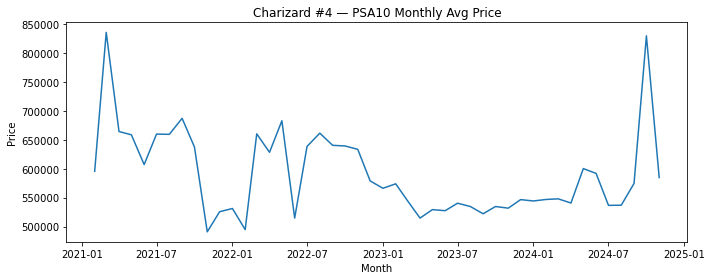

In [23]:

def plot_card(monthly_df, card, grade='PSA10'):
    sub = monthly_df[(monthly_df['card']==card) & (monthly_df['grade']==grade)].sort_values('year_month')
    if sub.empty:
        print(f"No data for {card} / {grade}")
        return
    plt.figure(figsize=(10,4))
    plt.plot(sub['year_month'], sub['price'])
    plt.title(f"{card} — {grade} Monthly Avg Price")
    plt.xlabel("Month")
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

#you can change the card name to one you care about:
plot_card(monthly_ts, 'Charizard #4', 'PSA10')


In [24]:

#Export Cleaned Artifacts
monthly_ts.to_csv("clean_monthly_time_series.csv", index=False)
metrics.to_csv("card_metrics_cagr_volatility.csv", index=False)

#Save top tables for convenience
top_cagr.to_csv("top20_cagr.csv", index=False)
top_risk_adj.to_csv("top20_risk_adjusted.csv", index=False)

print("Saved:")
print("clean_monthly_time_series.csv")
print("card_metrics_cagr_volatility.csv")
print("top20_cagr.csv")
print("top20_risk_adjusted.csv")


Saved:
clean_monthly_time_series.csv
card_metrics_cagr_volatility.csv
top20_cagr.csv
top20_risk_adjusted.csv
